In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

In [11]:
def option_chains(ticker):
    
    asset = yf.Ticker(ticker)
    expirations = asset.options
    
    chains = pd.DataFrame()
    
    for expiration in expirations:
        # tuple of two dataframes
        opt = asset.option_chain(expiration)
        
        calls = opt.calls
        calls['optionType'] = "call" # add option type column for each call in the dataframe
        
        puts = opt.puts
        puts['optionType'] = "put"
        
        chain = pd.concat([calls, puts]) # concatenate calls and puts dataframes
        chain['expiration'] = pd.to_datetime(expiration) # add expiration date column
        
        chains = pd.concat([chains, chain]) #add calls and puts to the chain DataFrame created before the loop
    
    chains["daysToExpiration"] = (chains.expiration - dt.datetime.today()).dt.days # add column days to expiration
    
    return chains

option_data = option_chains("TSLA")
option_data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionType,expiration,daysToExpiration
0,TSLA251121C00100000,2025-11-19 19:48:23+00:00,100.0,301.17,318.45,321.95,0.0,0.0,61.0,1514.0,0.000010,True,REGULAR,USD,call,2025-11-21,0
1,TSLA251121C00105000,2025-11-19 19:13:23+00:00,105.0,297.75,313.05,316.80,0.0,0.0,3.0,67.0,0.000010,True,REGULAR,USD,call,2025-11-21,0
2,TSLA251121C00110000,2025-11-19 15:03:55+00:00,110.0,301.55,308.30,311.95,0.0,0.0,1.0,33.0,0.000010,True,REGULAR,USD,call,2025-11-21,0
3,TSLA251121C00115000,2025-11-19 19:06:30+00:00,115.0,287.94,303.05,306.80,0.0,0.0,2.0,45.0,0.000010,True,REGULAR,USD,call,2025-11-21,0
4,TSLA251121C00120000,2025-11-19 19:06:30+00:00,120.0,283.00,298.30,301.95,0.0,0.0,2.0,38.0,0.000010,True,REGULAR,USD,call,2025-11-21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,TSLA280121P00900000,2025-11-17 18:53:38+00:00,900.0,505.90,497.10,498.85,0.0,0.0,9.0,76.0,0.438009,True,REGULAR,USD,put,2028-01-21,791
95,TSLA280121P00910000,2025-11-18 19:32:57+00:00,910.0,521.11,506.35,507.80,0.0,0.0,3.0,54.0,0.435827,True,REGULAR,USD,put,2028-01-21,791
96,TSLA280121P00920000,2025-11-18 17:31:31+00:00,920.0,531.55,514.95,516.60,0.0,0.0,2.0,62.0,0.432531,True,REGULAR,USD,put,2028-01-21,791
97,TSLA280121P00930000,2025-11-18 17:27:34+00:00,930.0,540.25,524.45,525.95,0.0,0.0,2.0,99.0,0.432341,True,REGULAR,USD,put,2028-01-21,791


In [12]:
ticker = "AAPL"
options = option_chains(ticker)
asset = yf.Ticker(ticker)
expirations = asset.options
expirations


('2025-11-21',
 '2025-11-28',
 '2025-12-05',
 '2025-12-12',
 '2025-12-19',
 '2025-12-26',
 '2026-01-02',
 '2026-01-16',
 '2026-02-20',
 '2026-03-20',
 '2026-04-17',
 '2026-05-15',
 '2026-06-18',
 '2026-08-21',
 '2026-09-18',
 '2026-12-18',
 '2027-01-15',
 '2027-06-17',
 '2027-12-17',
 '2028-01-21')

"\nplt.figure(figsize=(12,6))\nplt.scatter(calls_at_expiry['strike'], calls_at_expiry['impliedVolatility'], color='blue', label='Calls', alpha=0.5)\nplt.scatter(puts_at_expiry['strike'], puts_at_expiry['impliedVolatility'], color='red', label   ='Puts', alpha=0.5)\nplt.title('Implied Volatility vs Strike Price for ' + ticker + ' Options at expiration date' + expirations[19])\nplt.xlabel('Strike Price')\nplt.ylabel('Implied Volatility')\nplt.legend()\nplt.grid(True)\nplt.show()\nplt.savefig('implied_volatility_vs_strike_price.png')\n"

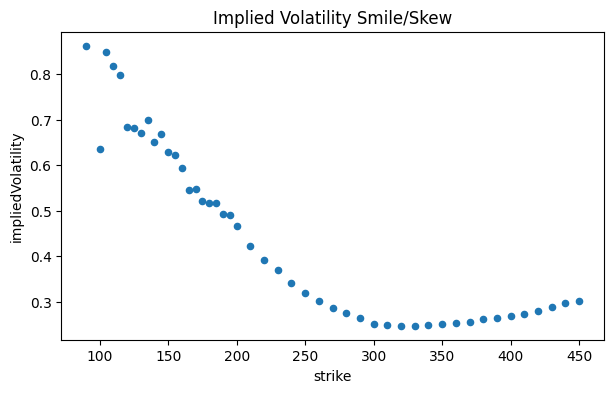

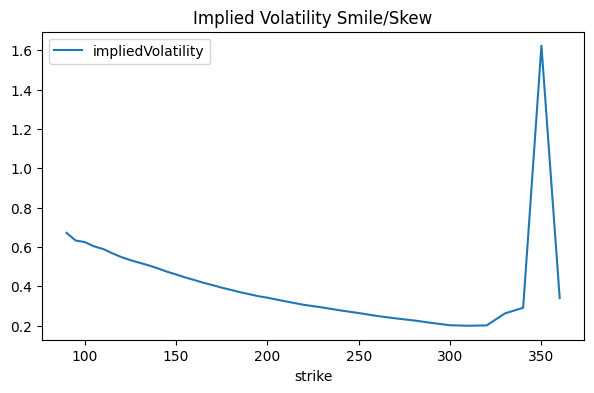

In [13]:

calls = options[options["optionType"] == "call"] # filter only calls through the column optionType we added before
puts = options[options["optionType"] == "put"] # filter only puts
calls_at_expiry = calls[calls["expiration"] == expirations[9]] # filter only options expiring on the first expiration date
puts_at_expiry = puts[puts["expiration"] == expirations[9]]
filtered_calls_at_expiry = calls_at_expiry[calls_at_expiry.impliedVolatility >= 0.0001] # filter only options with implied volatility greater than 0.1%
filtered_puts_at_expiry = puts_at_expiry[puts_at_expiry.impliedVolatility >= 0.0001]

filtered_calls_at_expiry.plot.scatter("strike", "impliedVolatility", title="Implied Volatility Smile/Skew", figsize=(7, 4))
filtered_puts_at_expiry[["strike", "impliedVolatility"]].set_index("strike").plot(title="Implied Volatility Smile/Skew", figsize=(7, 4))
'''
plt.figure(figsize=(12,6))
plt.scatter(calls_at_expiry['strike'], calls_at_expiry['impliedVolatility'], color='blue', label='Calls', alpha=0.5)
plt.scatter(puts_at_expiry['strike'], puts_at_expiry['impliedVolatility'], color='red', label   ='Puts', alpha=0.5)
plt.title('Implied Volatility vs Strike Price for ' + ticker + ' Options at expiration date' + expirations[19])
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('implied_volatility_vs_strike_price.png')
'''

In [33]:
options[["strike"]].iloc[1:3] # get a specific strike price to filter options

,strike
1,105.0
2,110.0


In [39]:
strike = options[["strike"]].iloc[1:2]['strike'].item() # get the strike price as a float value. .item() converts single value DataFrame to float
strike

105.0

<Axes: title={'center': 'Implied Volatility vs Expiration at fixed Strike Price'}, xlabel='expiration'>

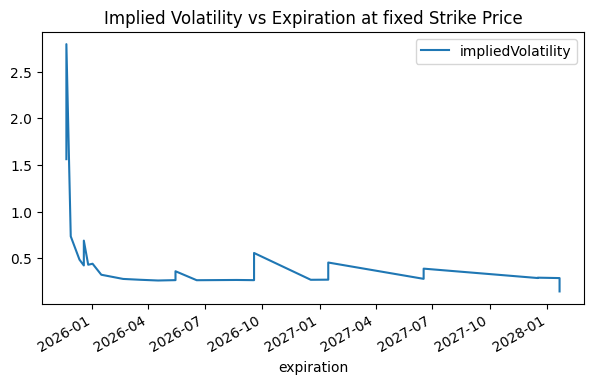

In [ ]:
# select an expiration to plot
calls_at_strike = options[options["strike"] == 400.0] #put strike instead of 400.0

filtered_calls_at_strike = calls_at_strike[calls_at_strike.impliedVolatility >= 0.001] # filter only options with implied volatility greater than 0.1%

filtered_calls_at_strike[["expiration", "impliedVolatility"]].set_index("expiration").plot(title="Implied Volatility vs Expiration at fixed Strike Price", figsize=(7, 4))

Implied Volatility decreases as expiration date increases (at fixed strike price). This is because less ppl bet on/ are willing to overpay options with expectation in the future. Also they consider less risky options with expiration dates further in the future.

The spikes suggests big announcements, economic news or scheduled events (merges, press conferences etc...). Here traders are bidding up the prices of options, expecting market swings (big market changes due to the scheduled news or announcement).

In [ ]:
surface = (calls[['daysToExpiration', 'strike', 'impliedVolatility']].pivot_table(values='impliedVolatility', index='strike', columns='daysToExpiration').dropna())
#creates a pivot_table = spreadsheet with impliedVolatility values, strike as rows and daysToExpiration as columns
surface

daysToExpiration,0,7,14,21,28,35,42,56,91,119,147,175,209,273,301,392,420,573,756,791
strike,,,,,,,,,,,,,,,,,,,,
195.0,2.619144,0.000010,0.803713,0.670413,0.601078,0.703982,0.700198,0.530400,0.555363,0.490789,0.494756,0.487493,0.451574,0.438055,0.425390,0.429663,0.428198,0.414312,0.415472,0.409887
210.0,0.000010,0.000010,0.666019,0.541997,0.578617,0.567875,0.587895,0.483282,0.441046,0.423468,0.417181,0.418371,0.405157,0.400702,0.401007,0.397650,0.392126,0.393072,0.393469,0.396246
220.0,0.000010,0.582035,0.551762,0.393561,0.495122,0.469488,0.520513,0.448248,0.390265,0.392706,0.386145,0.389075,0.385992,0.383063,0.381049,0.378867,0.382391,0.383063,0.384131,0.382605
230.0,0.000010,0.515630,0.479497,0.417242,0.385016,0.413214,0.426519,0.374396,0.360236,0.368994,0.372992,0.366217,0.365271,0.369025,0.363745,0.370719,0.363440,0.370154,0.369895,0.374640
240.0,0.640629,0.373053,0.455816,0.346198,0.345832,0.249275,0.351813,0.334235,0.347419,0.341987,0.348609,0.349616,0.345679,0.351020,0.352820,0.359229,0.357932,0.360968,0.365836,0.364096
250.0,0.000010,0.345221,0.305427,0.319831,0.298591,0.303474,0.325141,0.291694,0.327491,0.318793,0.319282,0.329169,0.330298,0.336493,0.338935,0.345755,0.344367,0.351676,0.353629,0.355666
260.0,0.000010,0.200203,0.262459,0.265510,0.260689,0.247444,0.264656,0.272773,0.292671,0.302345,0.304725,0.314490,0.315620,0.324332,0.326453,0.332191,0.334876,0.340674,0.347220,0.346778
270.0,0.208504,0.208504,0.208809,0.239387,0.236031,0.244881,0.240730,0.254371,0.279213,0.287513,0.288856,0.303596,0.305671,0.307929,0.315314,0.323676,0.324073,0.331794,0.341132,0.340644
280.0,0.209481,0.180672,0.201180,0.215462,0.222359,0.222481,0.225716,0.232979,0.263466,0.274757,0.276237,0.291450,0.294074,0.300269,0.304145,0.313926,0.315726,0.325141,0.333083,0.333274


In [42]:
x, y, z = surface.columns.values, surface.index.values, surface.values
x

array([  0,   7,  14,  21,  28,  35,  42,  56,  91, 119, 147, 175, 209,
       273, 301, 392, 420, 573, 756, 791])

In [49]:
X, Y = np.meshgrid(x, y)

X # meshgrid creates coordinate matrices from coordinate vectors

array([[  0,   7,  14,  21,  28,  35,  42,  56,  91, 119, 147, 175, 209,
        273, 301, 392, 420, 573, 756, 791],
       [  0,   7,  14,  21,  28,  35,  42,  56,  91, 119, 147, 175, 209,
        273, 301, 392, 420, 573, 756, 791],
       [  0,   7,  14,  21,  28,  35,  42,  56,  91, 119, 147, 175, 209,
        273, 301, 392, 420, 573, 756, 791],
       [  0,   7,  14,  21,  28,  35,  42,  56,  91, 119, 147, 175, 209,
        273, 301, 392, 420, 573, 756, 791],
       [  0,   7,  14,  21,  28,  35,  42,  56,  91, 119, 147, 175, 209,
        273, 301, 392, 420, 573, 756, 791],
       [  0,   7,  14,  21,  28,  35,  42,  56,  91, 119, 147, 175, 209,
        273, 301, 392, 420, 573, 756, 791],
       [  0,   7,  14,  21,  28,  35,  42,  56,  91, 119, 147, 175, 209,
        273, 301, 392, 420, 573, 756, 791],
       [  0,   7,  14,  21,  28,  35,  42,  56,  91, 119, 147, 175, 209,
        273, 301, 392, 420, 573, 756, 791],
       [  0,   7,  14,  21,  28,  35,  42,  56,  91, 119, 147, 1

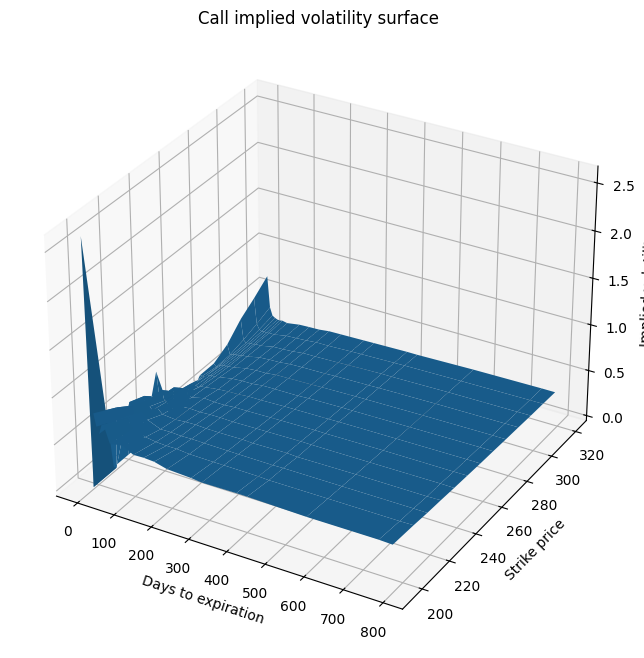

In [50]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d') # create 3d axis
# set labels
ax.set_xlabel('Days to expiration')
ax.set_ylabel('Strike price')
ax.set_zlabel('Implied volatility')
ax.set_title('Call implied volatility surface')

# plot
ax.plot_surface(X, Y, z)